In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats 

In [14]:
flats = pd.read_excel("C:/Users/woote/Desktop/Python/Projects/OtoDom - Web Scraping/results.xlsx",
                     names = ['index','hyperlink','title','price','price_m2','year_built','area_m2','market','rooms','floor']).\
drop(['index','hyperlink','price_m2'],axis = 1)

In [21]:
flats['floor'] = [int(0) if x == 'parter' else int(x) for x in flats.floor]
flats['area_m2'] = [float(x.replace(",",".").split(" ")[0]) for x in flats.area_m2]
flats['year_built'] = flats['year_built'].astype('int64')
flats['price'] = [float(x.replace('Zapytaj o cenę', '0').replace(" zł","").replace(" ","").\
                        replace(",","")) for x in flats.price]
flats.loc[flats['price']==0.0, 'price'] = np.nan

In [22]:
flats.dtypes

title          object
price         float64
year_built      int64
area_m2       float64
market         object
rooms           int64
floor           int64
dtype: object

In [23]:
flats.describe().round(2)

,price,year_built,area_m2,rooms,floor
count,110.00,182.00,182.00,182.00,182.00
mean,1286511.76,2021.40,54.84,2.55,2.07
std,5841356.43,0.65,5.84,0.53,1.06
min,401436.00,2020.00,45.36,2.00,0.00
25%,448706.75,2021.00,49.77,2.00,1.00
50%,500633.50,2021.00,53.45,3.00,2.00
75%,537100.00,2022.00,60.28,3.00,3.00
max,44014575.00,2023.00,64.96,4.00,4.00


In [31]:
flats.loc[flats.duplicated(keep = False),:].sort_values(['title'])

,title,price,year_built,area_m2,market,rooms,floor
36,"Jagodno / 2M, możliwe 3 / Bezpiecznie i Towarz...",442485.0,2021,50.14,pierwotny,2,2
85,"Jagodno / 2M, możliwe 3 / Bezpiecznie i Towarz...",442485.0,2021,50.14,pierwotny,2,2
35,"Jagodno / 3M, możliwe 4 / Bezpiecznie i Towarz...",499855.0,2021,59.33,pierwotny,3,1
86,"Jagodno / 3M, możliwe 4 / Bezpiecznie i Towarz...",499855.0,2021,59.33,pierwotny,3,1
68,Ołtaszyn // 2 Pokoje // Balkon // Spokojna Oko...,44014575.0,2021,51.63,pierwotny,2,4
97,Ołtaszyn // 2 Pokoje // Balkon // Spokojna Oko...,44014575.0,2021,51.63,pierwotny,2,4


In [32]:
flats = flats.drop_duplicates()

In [33]:
flats.isnull().sum()

title          0
price         72
year_built     0
area_m2        0
market         0
rooms          0
floor          0
dtype: int64

In [34]:
72/179

0.4022346368715084

In [35]:
median_price = flats.price.median()
flats.price.fillna(median_price, inplace = True)
flats.isnull().sum()

title         0
price         0
year_built    0
area_m2       0
market        0
rooms         0
floor         0
dtype: int64

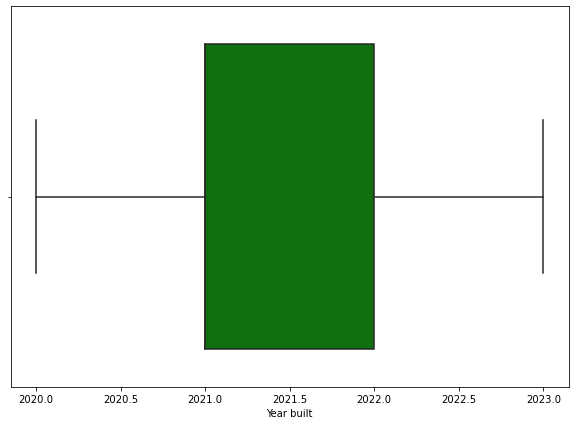

In [56]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = flats, x = 'year_built', color = "green")
ax.set(xlabel='Year built');

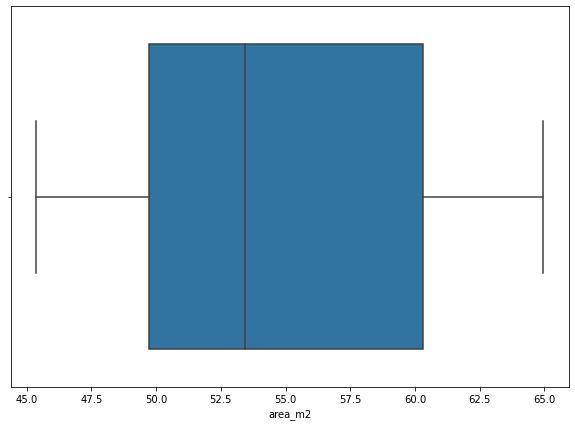

In [51]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = flats, x = 'area_m2')
ax.set(xlabel='area_m2');

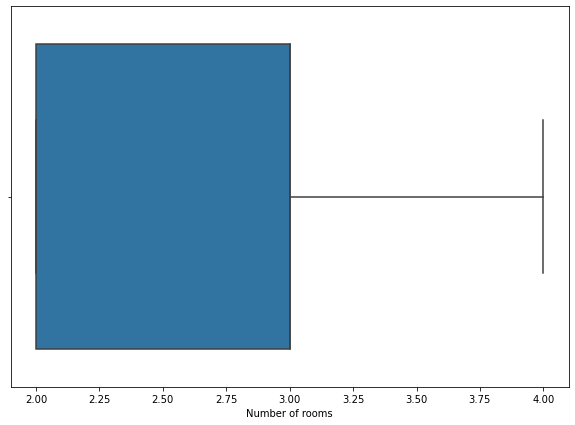

In [49]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = flats, x = 'rooms')
ax.set(xlabel='Number of rooms');

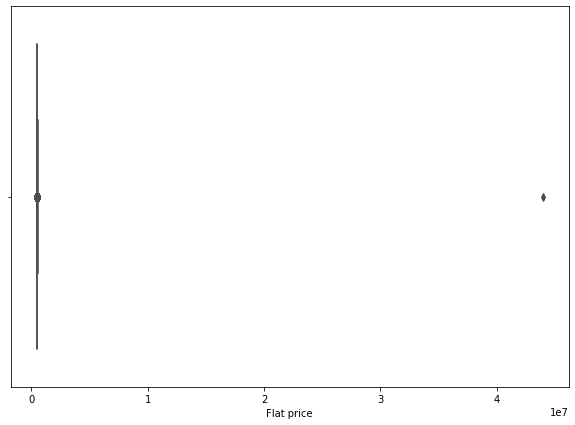

In [57]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = flats, x = 'price', color = "orange")
ax.set(xlabel='Flat price');

In [59]:
flats = flats.loc[flats.price != flats.price.max(),]

In [61]:
flats.price.describe()

count       178.000000
mean     497766.314607
std       37049.143027
min      401436.000000
25%      499000.000000
50%      500800.000000
75%      509273.000000
max      571500.000000
Name: price, dtype: float64

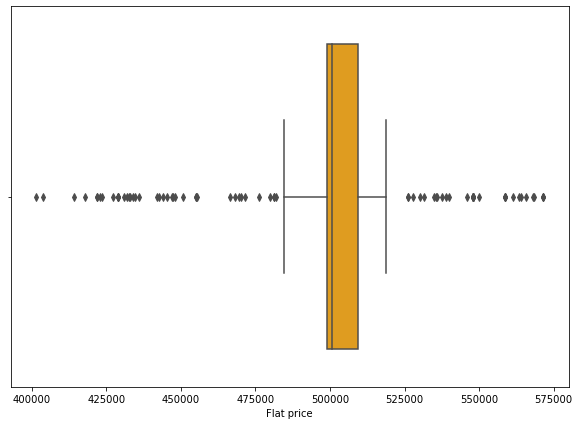

In [60]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = flats, x = 'price', color = "orange")
ax.set(xlabel='Flat price');

In [62]:
flats['price_m2'] = flats.price/flats.area_m2
flats.price_m2.describe()

<ipython-input-62-deafa4c14d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats['price_m2'] = flats.price/flats.area_m2


count      178.000000
mean      9131.495724
std        809.555549
min       7202.246125
25%       8589.996339
50%       8889.441350
75%       9682.069588
max      10987.275121
Name: price_m2, dtype: float64

In [65]:
flats['built'] = ["built" if (x == 2020) | (x == 2021) else "to be built" for x in flats.year_built]

<ipython-input-65-c2c8a1d95720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats['built'] = ["built" if (x == 2020) | (x == 2021) else "to be built" for x in flats.year_built]


In [77]:
flats.groupby(['built']).agg(['mean', 'median'])

price             year_built           area_m2         \
                      mean    median         mean median       mean median   
built                                                                        
built        496243.515789  500800.0  2020.852632   2021  57.060316  59.33   
to be built  499509.277108  500800.0  2022.036145   2022  52.371446  52.04   

                rooms            floor            price_m2               
                 mean median      mean median         mean       median  
built                                                                    
built        2.684211      3  2.115789      2  8718.332283  8648.989899  
to be built  2.421687      2  1.975904      2  9604.393639  9535.415080

In [80]:
built_hypo = flats.loc[flats.built == 'built','price_m2']
not_built_hypo = flats.loc[flats.built == 'to be built','price_m2']

alpha=0.05
t_value, p_value = stats.ttest_ind(built_hypo, not_built_hypo)
print("t_value1 = ",t_value, ", p_value1 = ", p_value)

t_value1 =  -8.680985090393076 , p_value1 =  2.592678631797329e-15
